# Answer Length
Crossword clues have another piece of information that we have been ignoring for now: the length of the answer is known ahead of time. This provides more infromation to the solver and can disambiguate a clue that otherwise could have multiple answers.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("cleaned_data/dupes_10_or_less_tokens.csv", keep_default_na=False)
df[df['clue'] == 'number 2, e.g.']

,answer,clue
260091,pencil,"number 2, e.g."
468371,leadpencil,"number 2, e.g."


In the example above we have the same clue, but two answers both of which could be valid depending on the shape of our crossword. If we add an additional column to our table we can include the answer length along with the clue when we train out model.

In [9]:
df['answer_length'] = df['answer'].str.len()

In [10]:
df[df['clue'] == 'number 2, e.g.']

,answer,clue,answer_length
260091,pencil,"number 2, e.g.",6
468371,leadpencil,"number 2, e.g.",10


## How much additional information does this provide?
Now that we know the answer length, let's try and figure out what percentage of clues in our dataset can be uniquely identified.

In [11]:
# how many clues have multiple answers
group = df.groupby(['clue'])['answer'].nunique().sort_values(ascending=False).reset_index(name='unique_answer_count')
multiple_answers = group[group['unique_answer_count'] > 1]
multiple_answers

,clue,unique_answer_count
0,split,38
1,cut,35
2,nonsense,31
3,o.k.,30
4,beat,30
...,...,...
35842,lord of the ring?,2
35843,employs,2
35844,"""if i ___ ...""",2
35845,provider of inside info?,2


In [12]:
# how many clues have multiple answers with the same length
group = df.groupby(['clue', 'answer_length'])['answer'].nunique().sort_values(ascending=False).reset_index(name='unique_answer_count')
multiple_answers_with_length = group[group['unique_answer_count'] > 1]
multiple_answers_with_length

,clue,answer_length,unique_answer_count
0,alphabet trio,3,13
1,calendar abbr.,3,13
2,up,5,12
3,split,4,11
4,cut,4,11
...,...,...,...
18546,memo header,4,2
18547,ignoble,4,2
18548,beguile,5,2
18549,ark contents,5,2


In [13]:
print(f'Percentage of clues with multiple answers: {len(multiple_answers) / len(df)}')
print(f'Percentage of clues with multiple answers, after considering length: {len(multiple_answers_with_length) / len(df)}')

Percentage of clues with multiple answers: 0.047237090742336674
Percentage of clues with multiple answers, after considering length: 0.024445428358330894


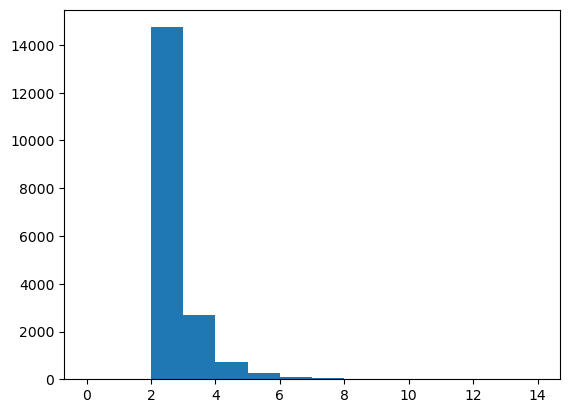

In [14]:
plt.hist(multiple_answers_with_length['unique_answer_count'].values, bins = list(range(15)))
plt.show()

So about 2.4% of our unique (clue, answer_length) pairs have multiple answers. Fortunately the vast majority of these have only two answers.

In [16]:
df.sort_values(by='answer_length', ascending=False)

,answer,clue,answer_length
72797,thetruthwillsetyoufree,"seeming opposite of ""ignorance is bliss""",22
408893,grossnationalconduct,nose-picking and belching in the white house?,20
23329,raidersofthelostark,indy film? (1981),19
363050,sermononthedismount,some moralizing about getting off a balance beam?,19
216628,oncebittentwiceshy,adage regarding skittishness,18
...,...,...,...
404058,nil,bubkes,3
404061,job,nine-to-five activity,3
404064,tao,lao-tzu principle,3
758873,sis,family girl,3


## Write Data

In [15]:
df.to_csv('cleaned_data/dupes_10_or_less_tokens_with_answer_length.csv', index=False)